In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from optic.plot import pconst
from optic.dsp import pnorm
from optic.models import awgn
import numpy as np
from scipy.stats import *

from IPython.core.display import HTML,display, Latex, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

C:\Users\edson\AppData\Local\Temp\ipykernel_6712\3032759675.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML,display, Latex, Math


In [11]:
%load_ext autoreload
%autoreload 2

In [3]:
def maxwellBolt(λ, const):
    
    p = np.zeros(const.size)
    
    for ind, x in enumerate(const):
        p[ind] = np.exp(-λ*np.abs(x)**2)
        
    p = p/np.sum(p)
    
    return p

In [6]:
from numpy.random import choice
const = np.arange(-3, 4, 2)
const = const/np.sqrt(np.mean(np.abs(const**2)))
λ = 0.05
probSymb = maxwellBolt(λ, const)

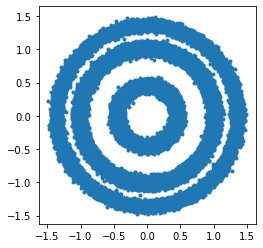

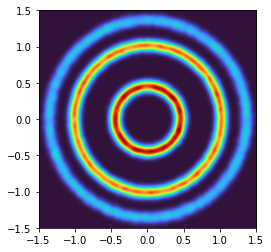

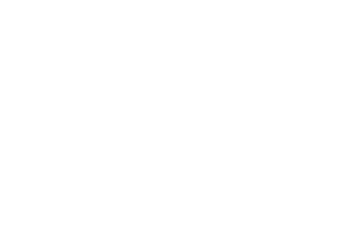

In [40]:
samples = 100000

xI = choice(const, samples, p=probSymb)   
xQ = choice(const, samples, p=probSymb) 

x = xI + 1j*xQ

snr = 25
Rs = 32e9
fo = 100e6

y = awgn(x, snr)
t = np.arange(0,len(y))*1/Rs
y = y*np.exp(1j*2*np.pi*fo*t)
z = y*np.exp(1j*0.0*np.abs(y)**2)

z = z.reshape(z.size, 1)

z = pnorm(z)
pconst(z, R=2, pType='fast')
pconst(z, R=1.5, pType='fancy')
plt.xlim(-2.25,2.25)
plt.ylim(-2.25,2.25)
plt.axis('off');

In [8]:
fig.savefig('G:\Meu Drive\Reviews MDPI\Applied Sciences Special Issue 2022\const-1.png', dpi=800, bbox_inches='tight', pad_inches=0)

NameError: name 'fig' is not defined

In [ ]:
import sys
from PIL import Image
filepath = 'G:\\Meu Drive\\Reviews MDPI\\Applied Sciences Special Issue 2022\\'

images = [Image.open(x) for x in [filepath+'const-1.png', filepath+'const-2.png', filepath+'const-3.png']]

widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

new_im.save(filepath+'test.jpg')